In [1]:
import pandas as pd
import math
from scipy.stats import skew, kurtosis
from statsmodels.tsa import stattools
import csv
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

In [2]:
path = r'C:/Users/aparajitas/OneDrive - Adobe/Documents/Aparajita_P/Chetan/User Identification From Walking Activity/User Identification From Walking Activity' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    
    for x in ['X']:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

    for y in ['Y']:
        q75,q25 = np.percentile(df.loc[:,y],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[y] < min,y] = np.nan
        df.loc[df[y] > max,y] = np.nan
        
    for z in ['Z']:
        q75,q25 = np.percentile(df.loc[:,z],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[z] < min,z] = np.nan
        df.loc[df[z] > max,z] = np.nan
        df['Z'] = df['Z'].abs()
           
    df = df.dropna(axis = 0)
    
    df["vector"] = df["X"].pow(2) + df["Y"].pow(2) + df["Z"].pow(2) 
    df["vector"] = df["vector"].pow(1/2)
    
    df=df.drop(['t','X','Y'], axis = 1)
    
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
#frame_gmm = pd.concat(li, axis=0, ignore_index=True)
#frame4 = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.isnull().sum()

Z         0
vector    0
dtype: int64

In [4]:
frame.shape

(99637, 2)

In [5]:
frame.head()

,Z,vector
0,2.9148,8.213224
1,2.5334,11.903599
2,2.5334,10.884842
3,2.7241,10.396885
4,2.7922,9.998056


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

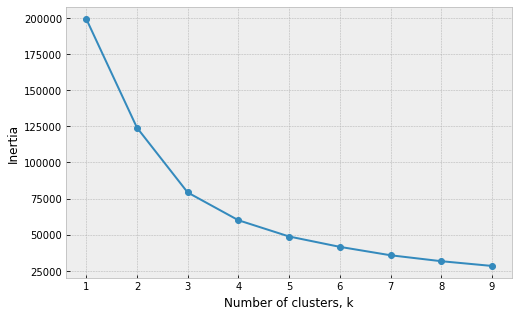

In [7]:
scaler = StandardScaler()
Data = scaler.fit_transform(frame)
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [10]:
frame["Z"] = pd.to_numeric(frame["Z"], downcast="float")
frame["vector"] = pd.to_numeric(frame["vector"], downcast="float")

frame.head()
frame.describe

<bound method NDFrame.describe of             Z     vector
0      2.9148   8.213223
1      2.5334  11.903599
2      2.5334  10.884842
3      2.7241  10.396886
4      2.7922   9.998055
...       ...        ...
99632  1.3757  11.768804
99633  3.2553  10.147224
99634  3.6775   7.525833
99635  2.9148   7.592791
99636  1.5255   6.948227

[99637 rows x 2 columns]>

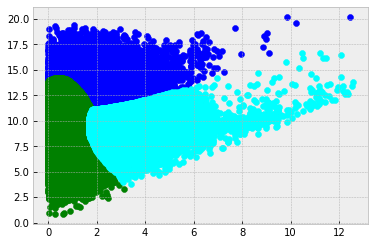

In [12]:
from sklearn.mixture import GaussianMixture

#predictions from gmm
#predictions from gmm

gmm = GaussianMixture(n_components=3)
gmm.fit(frame)

labels = gmm.predict(frame)
frame_g1 = pd.DataFrame(frame)
frame_g1['cluster'] = labels
frame_g1.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    frame = frame_g1[frame_g1["cluster"]==k]
    plt.scatter(frame["Weight"],frame["Height"],c=color[k])
plt.show()

In [13]:
gmm.converged_

True

In [14]:
gmm.n_iter_

10

In [15]:
gmm.weights_

array([0.16500138, 0.538036  , 0.29696262])

In [16]:
gmm.means_

array([[ 2.05332566, 13.03434107],
       [ 0.78279018,  8.93694096],
       [ 2.8749897 ,  9.46706344]])

In [17]:
gmm.covariances_

array([[[ 1.43736245, -0.14228035],
        [-0.14228035,  4.23736281]],

       [[ 0.27803386, -0.04465658],
        [-0.04465658,  5.04823588]],

       [[ 2.4561684 ,  0.36100068],
        [ 0.36100068,  1.58193443]]])

In [19]:
df_fast = pd.read_csv("C:/Users/aparajitas/Downloads/dataset2fast.csv")
df_fast2 = df_fast.drop(['date','t','X','Y','username','activity'], axis = 1)
df_fast2.head()
df_fast2.describe
df_fast3=df_fast2.head()

In [20]:
gmm.predict(df_fast3)

array([0, 1, 2, 1, 0], dtype=int64)

In [21]:
df_run = pd.read_csv("C:/Users/aparajitas/Downloads/dataset2run.csv")

In [22]:
df_run2 = df_run.drop(['date','t','X','Y','username','activity'], axis = 1)

In [23]:
df_run2.head()
df_run2.describe

<bound method NDFrame.describe of           Z    vector
0    4.0475  4.074634
1    4.4313  4.610782
2    4.0215  4.277629
3    4.2238  4.257374
4    4.2949  4.372995
..      ...       ...
196  4.3748  4.628126
197  4.3217  4.616702
198  4.0802  4.637597
199  4.1400  4.782581
200  4.2401  4.917740

[201 rows x 2 columns]>

In [24]:
df_run3=df_run2.head()

In [25]:
gmm.predict(df_run3)

array([2, 2, 2, 2, 2], dtype=int64)

In [26]:
df_sloww = pd.read_csv("C:/Users/aparajitas/Downloads/dataset2slow.csv")

In [27]:
df_sloww2 = df_sloww.drop(['date','t','X','Y','username','activity'], axis = 1)

In [28]:
df_sloww2.head()
df_sloww2.describe

<bound method NDFrame.describe of             Z    vector
0      0.2650  0.825148
1      0.6722  1.329887
2      0.4399  1.547307
3      0.3031  0.871729
4      0.4814  1.048889
...       ...       ...
35430  0.3084  0.902382
35431  0.4977  1.202684
35432  0.4587  1.295380
35433  0.2590  0.899638
35434  0.3140  0.864972

[35435 rows x 2 columns]>

In [29]:
df_sloww3=df_sloww2.head()

In [30]:
gmm.predict(df_sloww3)

array([1, 1, 1, 1, 1], dtype=int64)